## Evaluating the best classification precision and recall to maximize profits.
* Source of data: https://www.kaggle.com/kmalit/bank-customer-churn-prediction/data

In [14]:
# Import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.special import expit 
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('seaborn')
# Setting parameters for matplotlib figures
params = {'legend.fontsize': 'x-large',
         'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'25',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.color':'black',
         'ytick.color':'black',
         'figure.facecolor':'white'}
pylab.rcParams.update(params)

In [7]:
# Setting the data path
# data_dir = open(r"D:\Users\Documents\Python_practice\Kaggle\BankCustomerChurnPrediction")
df = pd.read_csv('Churn_Modelling.csv')

### Logistic Regression

In [10]:
# Selecting features to use and splitting the data into an 80% training set and 20% testing set.
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['Exited'],
    test_size = 0.2,
    random_state = 77)

* The advantage of Logistic Regression is that it can use the feature values of the samples to estimate the probability of each sample being classified as positive. By setting a decision threshold, probabilities above the threshold are classified as positive, while those below the threshold are classified as negative

In [11]:
# Setting Logistic Regression
clf = LogisticRegression()
# Training the model using the training set
X_train = np.array(X_train).reshape(-1,len(features))
clf.fit(X_train,y_train)

LogisticRegression()

In [12]:
# Calculating feature scores and positive probabilities
def sigmoid(X):
    # x = b0+b1x1+b2x2+...
    x = np.dot(X,clf.coef_.reshape(-1,1)) + clf.intercept_ 
    r = 1/(np.exp(-x)+1)
    return x, r

* First, convert customer features such as credit score, age, and whether they are an active user into a composite score. A higher composite score indicates that the model judges this customer to have a higher probability of churning.

In [13]:
x, prob = sigmoid(X_train)

In [16]:
# Setting variables for plotting
x_lins = np.linspace(-5, 5, 10000).ravel()
y_lins = expit(x_lins).ravel()

# Color setting
blue = '#296ea3'
green = '#4bf2b7'
yellow = '#f8b15a'

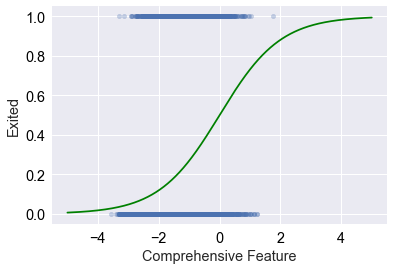

In [17]:
plt.scatter(x, y_train, alpha = 0.3, s = 20)
plt.xlabel('Comprehensive Feature')
plt.ylabel('Exited')
plt.plot(x_lins, y_lins, color = 'green')

* The blue dots represent individual sample points in the dataset. 
* Each sample point receives a composite score based on its multiple feature values. 
* For visualization purposes, only 200 sample points are randomly selected and plotted on the graph. 
* Sample points are divided into two groups - the upper data points is churn (Exited = 1), while the lower data points is not churn (Exited = 0)

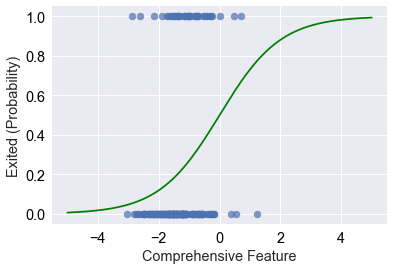

In [20]:
# Sampling for better visualization
rs = np.random.RandomState(77)
sample_idx = rs.choice(x.shape[0], 200, replace = False)

x_sample = x[sample_idx]
prob_sample = prob[sample_idx]
y_sample = np.array(y_train)[sample_idx]

plt.scatter(x_sample, y_sample, alpha = 0.7, s = 50)
plt.xlabel('Comprehensive Feature')
plt.ylabel('Exited (Probability)')
plt.plot(x_lins, y_lins, color = 'green');

* The green curve is the probability function curve. 
* Taking the lower-right data point as an example, we can follow the purple dashed line up to the green curve and then follow the orange dashed line to find the corresponding predicted probability value. 
* This is the probability that the model predicts that the customer represented by this sample point will churn. In this case, the customer is predicted to have a churn probability of approximately 0.79, but in reality they did not churn

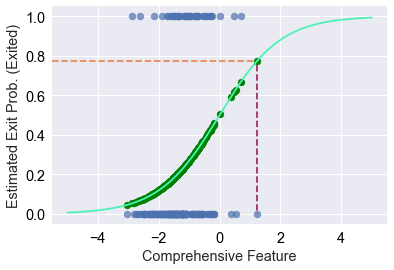

In [23]:
x_sam_sort = np.sort(x_sample, axis = 0)
prob_sam_sort = np.sort(prob_sample, axis = 0)

d1 = [x_sam_sort[-1][0], x_sam_sort[-1][0]]
d2 = [prob_sam_sort[-1][0]-0.02, 0]

plt.scatter(x_sample, y_sample, alpha = 0.7, s = 50)
plt.xlabel('Comprehensive Feature')
plt.ylabel('Estimated Exit Prob. (Exited)')
plt.plot(x_lins, y_lins, color = green)
plt.scatter(x_sam_sort, prob_sam_sort, color = 'green')
plt.plot(d1,d2, ls = '--', color = '#a3295e')
plt.axhline(y = prob_sam_sort[-1][0], xmin=0, xmax = 0.61, ls = '--', color = '#e88a54');

* Using 0.5 as the decision threshold means that leaving probabilities above 0.5 are classified as leaving, and probabilities below 0.5 are classified as not leaving.
* This is equivalent to using a composite score of 0 as the criterion for predicting classification: scores above 0 are classified as leaving, and scores below 0 are classified as not leaving.
* The choice of decision threshold can have a significant impact on model performance and should be carefully considered.
* In this case, using a threshold of 0.5 may not be optimal, as it may lead to a high rate of false positives or false negatives.

In [26]:
colors = ['orange' if prob_sam_sort[i] > 0.5 else 'green' for i in range(x_sample.shape[0])]

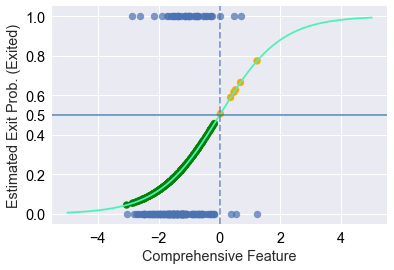

In [27]:
plt.scatter(x_sample, y_sample, alpha = 0.7, s = 50)
plt.xlabel('Comprehensive Feature')
plt.ylabel('Estimated Exit Prob. (Exited)')
plt.scatter(x_sam_sort, prob_sam_sort, color = colors)
plt.plot(x_lins, y_lins, color = green)
plt.axvline(x = 0, alpha = 0.7, ls = '--')
plt.axhline(y = 0.5, alpha = 0.7, color = blue)
plt.yticks([0,0.2,0.4,0.5,0.6,0.8,1]);

* Feeding the 2000 unused data points in the Testing Set into the trained model for prediction
* The precision of the model with a threshold of 0.5 is 0.3283, indicating a relatively low proportion of true positives among all predicted positives.
* The recall of the model with a threshold of 0.5 is 0.055, indicating that the model can only identify a small proportion of actual positives among all true positives.

In [28]:
# Predictions with different thresholds
X_test_predict_prob = clf.predict_proba(np.array(X_test))

predict_result = {}
for _ in range(11):
    p = round(_*0.1,1)
    l = [1 if X_test_predict_prob[i][1] >= p else 0 for i in range(X_test_predict_prob.shape[0])]
    predict_result[str(p)]=l

In [29]:
predict_result.keys()

dict_keys(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

### Confusion Matrix

In [30]:
def cf_matrix(prediction, true_label):
    p = prediction
    a = true_label
    
    TP = [x + y == 2 for x, y in zip(p, a)] 
    #predict = 1, actually = 1
    TP_count = sum(TP)

    FN = [y - x == 1 for x, y in zip(p, a)] #type II error
    #predict = 0, actually = 1
    FN_count = sum(FN)

    FP = [x - y == 1 for x, y in zip(p, a)] #type I error #siginificant level
    #predict = 1, actually = 0
    FP_count = sum(FP)
    
    TN = [x + y == 0 for x, y in zip(p, a)] 
    #predict = 0, actually = 0
    TN_count = sum(TN)  
    
    acc = (TP_count+TN_count)/(TP_count+FP_count+FN_count+TN_count)
    if (TP_count+FP_count) == 0:
        pre = 'no positive prediction (division by zero)'
    else:
        pre = (TP_count)/(TP_count+FP_count)
    rec = (TP_count)/(TP_count+FN_count)
    
    dict_ = {'cf_matrix': [[TP_count, FN_count], [FP_count, TN_count]], 
            'accuracy': acc, 
            'precision': pre, 
            'recall': rec}
    
    return dict_

In [31]:
cf_m5 = cf_matrix(predict_result["0.5"], y_test)['cf_matrix']
cf_m5

[[22, 378], [45, 1555]]

* Confusion Matrix with the decision threshold of 0.5

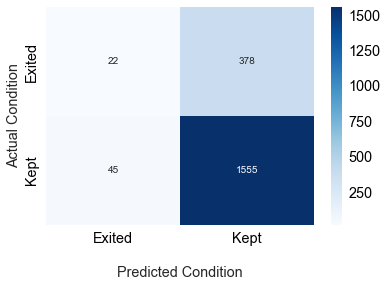

In [32]:
ax = sns.heatmap(cf_m5, annot = True, cmap = 'Blues', fmt = 'd')

ax.set_xlabel('\nPredicted Condition')
ax.set_ylabel('Actual Condition');

ax.xaxis.set_ticklabels(['Exited','Kept'])
ax.yaxis.set_ticklabels(['Exited','Kept']);

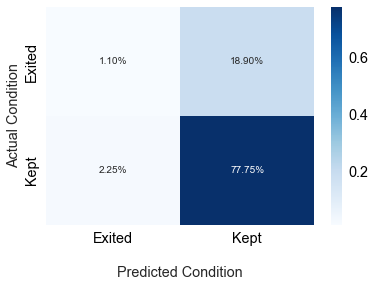

In [33]:
cf_matrix_ratio = cf_m5/np.sum(cf_m5)

ax = sns.heatmap(cf_matrix_ratio, annot = True, fmt = '.2%', cmap = 'Blues')

ax.set_xlabel('\nPredicted Condition')
ax.set_ylabel('Actual Condition');

ax.xaxis.set_ticklabels(['Exited','Kept'])
ax.yaxis.set_ticklabels(['Exited','Kept']);

* Confusion Matrix with the decision threshold of 0.1

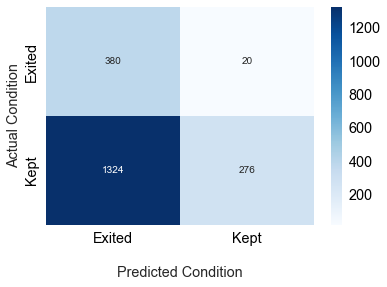

In [43]:
cf_m1 = cf_matrix(predict_result["0.1"], y_test)['cf_matrix']
cf_m1

ax1 = sns.heatmap(cf_m1, annot = True, cmap = 'Blues', fmt = 'd')

ax1.set_xlabel('\nPredicted Condition')
ax1.set_ylabel('Actual Condition');

ax1.xaxis.set_ticklabels(['Exited','Kept'])
ax1.yaxis.set_ticklabels(['Exited','Kept']);

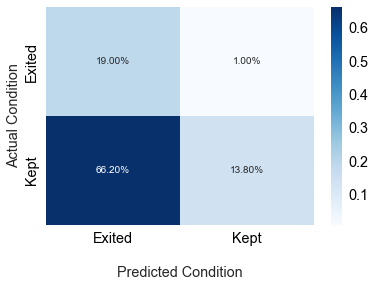

In [44]:
cf_matrix_ratio = cf_m1/np.sum(cf_m1)

ax1 = sns.heatmap(cf_matrix_ratio, annot = True, fmt = '.2%', cmap = 'Blues')

ax1.set_xlabel('\nPredicted Condition')
ax1.set_ylabel('Actual Condition');

ax1.xaxis.set_ticklabels(['Exited','Kept'])
ax1.yaxis.set_ticklabels(['Exited','Kept']);

* Confusion Matrix with the decision threshold of 0.8

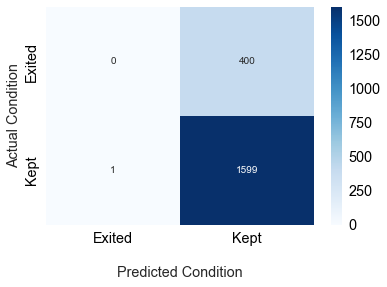

In [40]:
cf_m8 = cf_matrix(predict_result["0.8"], y_test)['cf_matrix']
cf_m8

ax8 = sns.heatmap(cf_m8, annot = True, cmap = 'Blues', fmt = 'd')

ax8.set_xlabel('\nPredicted Condition')
ax8.set_ylabel('Actual Condition');

ax8.xaxis.set_ticklabels(['Exited','Kept'])
ax8.yaxis.set_ticklabels(['Exited','Kept']);

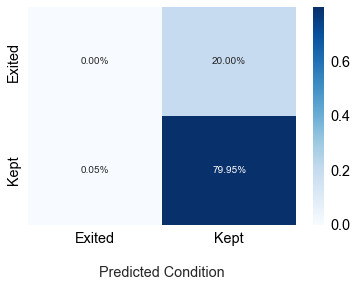

In [41]:
cf_matrix_ratio = cf_m8/np.sum(cf_m8)

ax8 = sns.heatmap(cf_matrix_ratio, annot = True, fmt = '.2%', cmap = 'Blues')

ax8.set_xlabel('\nPredicted Condition')
ax.set_ylabel('Actual Condition');

ax8.xaxis.set_ticklabels(['Exited','Kept'])
ax8.yaxis.set_ticklabels(['Exited','Kept']);

### Precision and recall

In [34]:
pre_list = []
rec_list = []
pos_pred = []
for _ in range(11):
    p = round(_*0.1,1)
    key = str(p)
    
    pre_ = cf_matrix(predict_result[key], y_test)['precision']
    rec_ = cf_matrix(predict_result[key], y_test)['recall']
    
    pos_ = np.sum(cf_matrix(predict_result[key], y_test)['cf_matrix'], axis = 0)[0]
    
    pre_list.append(pre_)
    rec_list.append(rec_)
    pos_pred.append(pos_)

* Threshold values become more strict from right to left
* Numbers on data points represent predicted customer churn
* Number of predicted customer churn decreases as threshold value increases
* Loose threshold values lead to increased Recall but decreased Precision, as shown by the curve to the right of the green dashed line.

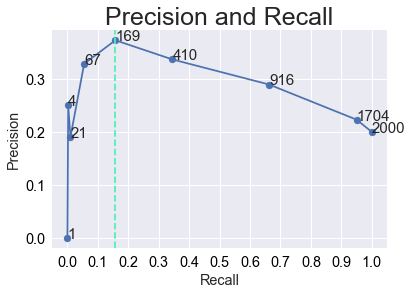

In [46]:
plt.plot(rec_list[:-2], pre_list[:-2])
plt.scatter(rec_list[:-2], pre_list[:-2])
plt.title("Precision and Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axvline(x = rec_list[4], ls = '--', color = green)
plt.xticks([round(i*0.1,1) for i in range(11)]);

for i, txt in enumerate(pos_pred[:-2]):
    plt.annotate(txt, (rec_list[:-2][i], pre_list[:-2][i]), fontsize = 15);

### Revenue and Cost

* Assuming that it costs 100 to implement a remedy for each customer, there is a 1/5 chance that a customer who was originally planning to leave will change their mind after receiving the remedy, and this will bring a subsequent revenue of 2000 for the company. 
* By the other way customers who were not planning to leave will not change their consumption after receiving the remedy and will not bring any subsequent revenue to the company.

In [36]:
def revenue_cost(predict_result, y_test, price, keep_prob, potential_revenue, threshold):
    p = price
    kp = keep_prob
    pr = potential_revenue
    key = str(threshold)

    TP_count = cf_matrix(predict_result[key], y_test)['cf_matrix'][0][0]
    FN_count = cf_matrix(predict_result[key], y_test)['cf_matrix'][0][1]
    FP_count = cf_matrix(predict_result[key], y_test)['cf_matrix'][1][0]
    TN_count = cf_matrix(predict_result[key], y_test)['cf_matrix'][1][1]

    cost = (TP_count+FP_count)*price
    revenue = TP_count*kp*pr 
    dict_ = {'Revenue': revenue, 'Cost':cost}

    return dict_

In [85]:
rev_list = []
cost_list = []
p_list = []
profit_list = []
rev_cost_rate = []

for _ in range(11):
    p = round(_*0.1,1)
    key = p

    rc = revenue_cost(predict_result, y_test, price = 100, keep_prob = 1/5, potential_revenue = 2000, threshold = key)
    
    rev_list.append(rc['Revenue'])
    cost_list.append(rc['Cost'])
    p_list.append(p)
    profit_list.append(rc['Revenue']-rc['Cost'])
    if rc['Cost'] != 0:
        rev_cost_rate.append(rc['Revenue']/rc['Cost'])

* Using the testing set data, the total revenue and total cost can be estimated based on different threshold values for the predicted classifications and actual classifications. 
* After deducting the cost from the revenue, it can be observed that the threshold value of 0.2 will result in the highest total profit for this case. The cost expenditure at this threshold is approximately 90000

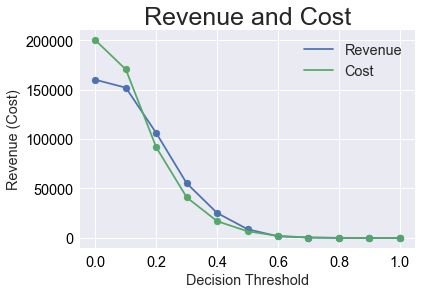

In [86]:
fig, ax1 = plt.subplots()
ax1.plot(p_list, rev_list)
ax1.plot(p_list, cost_list)
ax1.scatter(p_list, rev_list)
ax1.scatter(p_list, cost_list)
ax1.set_title("Revenue and Cost")
ax1.set_xlabel("Decision Threshold")
ax1.set_ylabel("Revenue (Cost)")
ax1.legend(['Revenue', 'Cost']);

* Dividing the revenue by the cost reveals that setting the threshold value at 0.4 will result in the highest financial efficiency. The cost expenditure at this threshold is approximately 23000, which is significantly less than setting the threshold at 0.2
* Therefore, if the company has many customers and faces a budget constraint, or if there are other projects that can utilize the funds more efficiently to achieve higher returns, choosing a threshold value of 0.3 or 0.4 may be a better option. These threshold values have a higher financial efficiency compared to setting the threshold at 0.2 and can still yield a significant profit while reducing cost expenditures

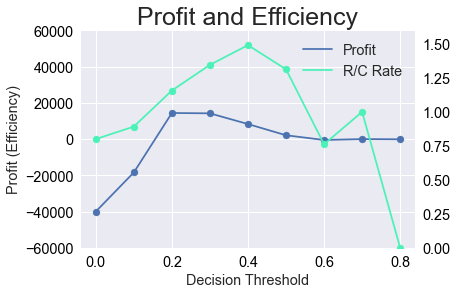

In [87]:
last = len(rev_cost_rate)

fig, ax1 = plt.subplots()
l1 = ax1.plot(p_list[:last], profit_list[:last])
ax1.scatter(p_list[:last], profit_list[:last])

ax1.set_title("Profit and Efficiency")
ax1.set_xlabel("Decision Threshold")
ax1.set_ylabel("Profit (Efficiency)")
ax1.set_ylim([-60000,60000])

ax2 = ax1.twinx()
l2 = ax2.plot(p_list[:last], rev_cost_rate[:last], color = green)
ax2.scatter(p_list[:last], rev_cost_rate[:last], color = green)
ax2.set_ylim([0.0, 1.6])

ax2.grid(None)

l1_l2 = l1 + l2
plt.legend(l1_l2,['Profit', 'R/C Rate']);